## Project: Predicting Boston Housing Prices
### Data  

The modified Boston housing dataset consists of 489 data points, with each datapoint having 3 features. This dataset is a modified version of the Boston Housing dataset found on the <a href="https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning Repository</a> and you can find the main dataset on the 
<a href="https://www.kaggle.com/c/boston-housing">Kaggle</a>


### Features  

RM: average number of rooms per dwelling (Total number of rooms in home)  
LSTAT: percentage of population considered lower status (Neighborhood poverty level )  
PTRATIO: pupil-teacher ratio by town  (Student-teacher ratio of nearby schools)  
Target Variable: MEDV: median value of owner-occupied homes (house price)  

In [32]:
# Import libraries:
#from sklearn.linear_model import LinearRegression
#from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
#import seaborn as sns

In [6]:
# Load the Boston housing dataset
#boston_data = load_boston()
df = pd.read_csv('housing.csv')
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


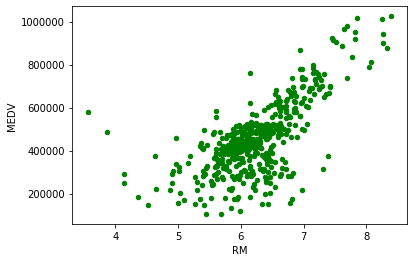

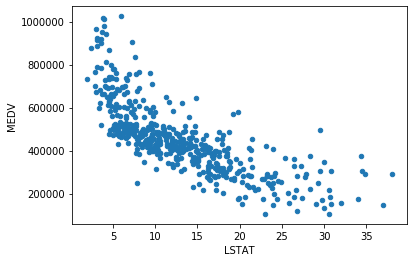

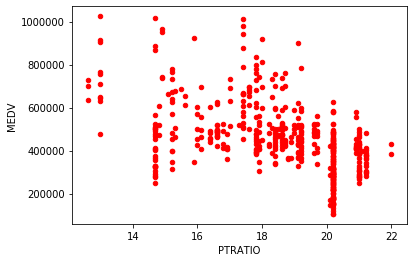

In [17]:
# Data Exploration
df.plot.scatter(x='RM',y='MEDV', c='g')
df.plot.scatter('LSTAT', 'MEDV')
df.plot.scatter('PTRATIO', 'MEDV', c='r')


In [30]:
#define variables(features,prices)
prices = df['MEDV']
features = df[['RM','LSTAT','PTRATIO']]
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [33]:
#split the data to two sets. training set and testing set:
x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size=0.5)

In [38]:
#print
print("training set:",x_train.shape,y_train.shape [0])
print("testing set:",x_test.shape,y_test.shape[0])


training set: (244, 3) 244
testing set: (245, 3) 245


In [40]:
#create the rgression model:
model = LinearRegression()

In [41]:
#fit/train the model:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#predict X_test by the model:
y_pred = model.predict(x_test)

In [47]:
#model accuracy:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7137772575050441

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree =2)
X_poly = poly_feat.fit_transform(x_train)
testing_data = poly_feat.transform(x_test)
# Make and fit the polynomial regression model\n",
# TODO: Create a LinearRegression object and fit it to the polynomial predictor\n",
# features\n",
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_poly_pred = poly_model.predict(testing_data)

In [57]:
r2_score(y_test, y_poly_pred)

0.8411358034601749